Name: Lim Yu Yang Ian
Class: DAAA/FT/2A/02
Admin No: 2201874

In [184]:
# Import Libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression

# Import Model Evaluation Tools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [185]:
random_state = 40

In [186]:
df = pd.read_csv("./ST1511 AIML-CA1-datasets/housing_dataset.csv")
df.head()

,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,0,Chicago,742.0,4,2,3,furnished,1330000
1,1,Denver,896.0,4,4,4,furnished,1225000
2,2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,3,Seattle,750.0,4,2,2,furnished,1221500
4,4,New York,742.0,4,1,2,furnished,1141000


In [187]:
df.describe()

,House ID,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Price ($)
count,545.00000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,272.00000,515.054128,2.965138,1.286239,1.805505,4.766729e+05
std,157.47222,217.014102,0.738064,0.502470,0.867492,1.870440e+05
min,0.00000,165.000000,1.000000,1.000000,1.000000,1.750000e+05
25%,136.00000,360.000000,2.000000,1.000000,1.000000,3.430000e+05
50%,272.00000,460.000000,3.000000,1.000000,2.000000,4.340000e+05
75%,408.00000,636.000000,3.000000,2.000000,2.000000,5.740000e+05
max,544.00000,1620.000000,6.000000,4.000000,4.000000,1.330000e+06


In [188]:
display(df.value_counts("City"))
display(df.value_counts("No. of Bedrooms"))
display(df.value_counts("No. of Toilets"))
display(df.value_counts("Stories"))

City
New York    158
Seattle     134
Boston      105
Denver       89
Chicago      59
dtype: int64

No. of Bedrooms
3    300
2    136
4     95
5     10
1      2
6      2
dtype: int64

No. of Toilets
1    401
2    133
3     10
4      1
dtype: int64

Stories
2    238
1    227
4     41
3     39
dtype: int64

In [189]:
sns.set_style("darkgrid")

Target variable is price

Text(0, 0.5, 'Count')

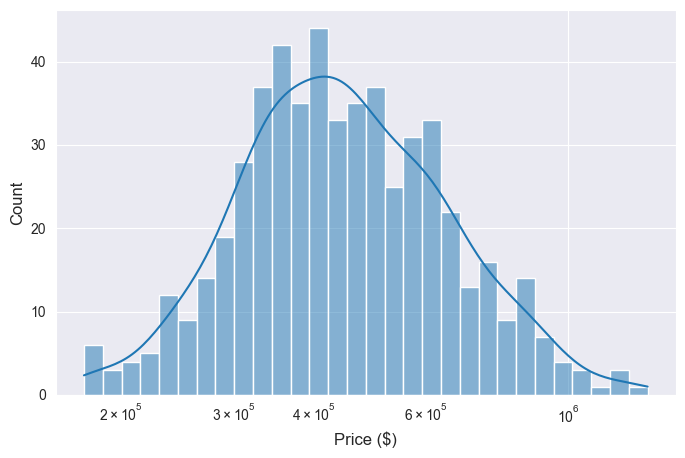

In [190]:
# Visualize relationship btw fixed acidity & quality of wine
fig = plt.figure(figsize = (8,5))
sns.histplot(data=df, x="Price ($)", kde=True, log_scale=True, bins=30)

#  set labels
plt.xlabel("Price ($)", size=12)
plt.ylabel("Count", size=12)

C:\Users\ianli_gu6oysd\AppData\Local\Temp\ipykernel_4764\2920371045.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'GnBu')


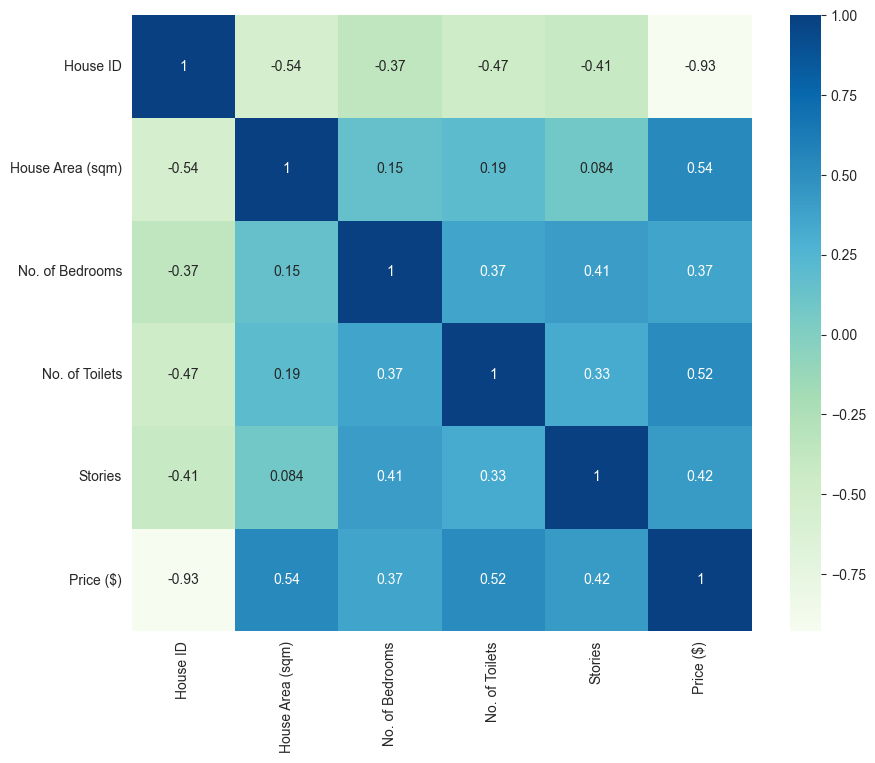

In [191]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'GnBu')
plt.show()

In [192]:
X, y = df.drop(["Price ($)", "House ID"], axis=1), df["Price ($)"]

In [193]:
hot_col = ["City", "Renovation Status"]
ohe = OneHotEncoder()
ohe.fit(X[hot_col])
X = pd.concat([
    X.drop(hot_col, axis=1).reset_index(drop=True),
    pd.DataFrame(
        ohe.transform(X[hot_col]).toarray(),
        columns=ohe.get_feature_names_out(),
    ),
],
axis=1)
display(X)

,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,City_Boston,City_Chicago,City_Denver,City_New York,City_Seattle,Renovation Status_furnished,Renovation Status_semi-furnished,Renovation Status_unfurnished
0,742.0,4,2,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,896.0,4,4,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,996.0,3,2,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,750.0,4,2,2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,742.0,4,1,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,300.0,2,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
541,240.0,3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
542,362.0,2,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
543,291.0,3,1,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [194]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=random_state
)

print(X_train.shape)
print(X_test.shape)

(436, 12)
(109, 12)


In [195]:
display(X_train)
df.info()

,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,City_Boston,City_Chicago,City_Denver,City_New York,City_Seattle,Renovation Status_furnished,Renovation Status_semi-furnished,Renovation Status_unfurnished
342,715.2,3,1,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
47,660.0,3,1,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
437,588.0,3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
15,600.0,4,1,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
225,644.0,2,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440,364.0,4,1,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
165,645.0,3,2,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,1620.0,5,3,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
219,700.0,3,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   House ID           545 non-null    int64  
 1   City               545 non-null    object 
 2   House Area (sqm)   545 non-null    float64
 3   No. of Bedrooms    545 non-null    int64  
 4   No. of Toilets     545 non-null    int64  
 5   Stories            545 non-null    int64  
 6   Renovation Status  545 non-null    object 
 7   Price ($)          545 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 34.2+ KB


In [196]:
name_col = ["House Area (sqm)"]
sc = StandardScaler()
X_train[name_col] = sc.fit_transform(X_train[name_col])
X_test[name_col] = sc.fit_transform(X_test[name_col])

In [197]:
print(X_train)

     House Area (sqm)  No. of Bedrooms  No. of Toilets  Stories  City_Boston  \
342          0.888659                3               1        2          1.0   
47           0.638034                3               1        4          0.0   
437          0.311132                3               1        1          0.0   
15           0.365616                4               1        2          0.0   
225          0.565389                2               1        1          1.0   
..                ...              ...             ...      ...          ...   
440         -0.705897                4               1        2          0.0   
165          0.569930                3               2        1          0.0   
7            4.996731                5               3        2          0.0   
219          0.819647                3               1        2          1.0   
326         -0.497043                4               1        1          0.0   

     City_Chicago  City_Denver  City_Ne

In [198]:
scoring_methods = [
    "r2",
    "neg_root_mean_squared_error",
    "neg_mean_absolute_error",
    "neg_mean_absolute_percentage_error",
    "neg_mean_squared_error",
]

In [199]:
# fit a linear regression model to data
model = LinearRegression()
model.fit(X_train, y_train)
print(model)

# make predictions
y_pred = model.predict(X_test)

print(f"R^2: {model.score(X_test, y_test)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

LinearRegression()
R^2: 0.5113648098253513
RMSE: 144969.7891948467
